# Introduction to the pandas library

### The "drinks.csv" file contains data on average alcohol consumption by country among those 15 and older, in 2010, separately by beverage type. Values provided are the average number of servings in three categories (beer, wine, and spirits). 

### Note: I also included the "imdb_1000.csv" and "titanic_train.csv" files in this lab if you like to explore some of the analysis shown in the lecture slides. 


In [1]:
import numpy as np
import pandas as pd

#### Use ```df = pd.read_csv(filename)``` to read in the alcohol consumption data("drinks.csv") and store the dataframe. 

In [2]:
drinks = pd.read_csv("drinks.csv")


#### Call head() on the dataframe to output the top five rows of the dataframe.

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


#### Call describe() on the dataframe to see some general descriptive statistics. Notice some of the outliers, e.g., compare the maximum to the median. 

In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


#### Which country drinks the most beer? spirits? wine?

Hint: Use ```df.sort_values(by="column_name", ascending=False)```

In [5]:
drinks.sort_values(by='beer_servings', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
45,Czech Republic,361,170,134,11.8,Europe
62,Gabon,347,98,59,8.9,Africa
65,Germany,346,117,175,11.3,Europe
98,Lithuania,343,244,56,12.9,Europe
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,Africa
158,Somalia,0,0,0,0.0,Africa
111,Monaco,0,0,0,0.0,Europe
128,Pakistan,0,0,0,0.0,Asia


In [6]:
drinks.sort_values(by='wine_servings', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,France,127,151,370,11.8,Europe
136,Portugal,194,67,339,11.0,Europe
3,Andorra,245,138,312,12.4,Europe
166,Switzerland,185,100,280,10.2,Europe
48,Denmark,224,81,278,10.4,Europe
...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,Asia
161,Sri Lanka,16,104,0,2.2,Asia
128,Pakistan,0,0,0,0.0,Asia
78,Indonesia,5,1,0,0.1,Asia


In [7]:
drinks.sort_values(by='spirit_servings', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America
15,Belarus,142,373,42,14.4,Europe
73,Haiti,1,326,1,5.9,North America
141,Russian Federation,247,326,73,11.5,Asia
144,St. Lucia,171,315,71,10.1,North America
...,...,...,...,...,...,...
158,Somalia,0,0,0,0.0,Africa
128,Pakistan,0,0,0,0.0,Asia
63,Gambia,8,0,1,2.4,Africa
56,Eritrea,18,0,0,0.5,Africa


#### Which continent drinks the most beer? The least? Hint: Call groupby('continent') on the dataframe, then look at the mean of the "beer_servings" column. 

In [8]:
drinks.groupby('continent')["beer_servings"].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

#### Use the plot(kind="bar") to plot the average beer consumption by continent. Same code as the previous cell but add the .plot(kind="bar") call. 

<AxesSubplot:xlabel='continent'>

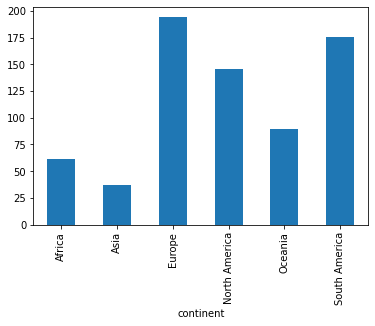

In [9]:
drinks.groupby('continent')["beer_servings"].mean().plot(kind="bar")

<AxesSubplot:xlabel='continent'>

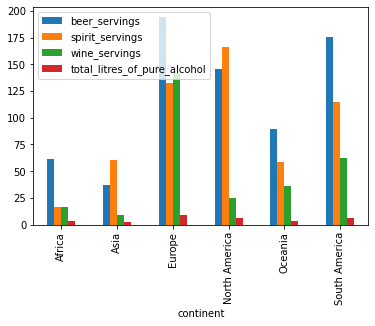

In [12]:
drinks.groupby('continent').mean().plot(kind="bar")

#### Since Europe has the highest consumption, apply a filter to only consider countries in Europe and call sort_values on "beer_servings". Which are the top three countries in Europe with the highest beer consumption?

In [11]:
drinks.loc[drinks['continent'] == "Europe"].sort_values(by='beer_servings', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,Europe
65,Germany,346,117,175,11.3,Europe
135,Poland,343,215,56,10.9,Europe
98,Lithuania,343,244,56,12.9,Europe
81,Ireland,313,118,165,11.4,Europe
140,Romania,297,122,167,10.4,Europe
16,Belgium,295,84,212,10.5,Europe
160,Spain,284,157,112,10.0,Europe
151,Serbia,283,131,127,9.6,Europe
93,Latvia,281,216,62,10.5,Europe
